In [2]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
#import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
#from dtreeviz.trees import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.metrics import make_scorer

#import graphviz

from sklearn.metrics import fbeta_score


from sklearn.model_selection import cross_val_score,  StratifiedKFold


In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_N.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000143512.11,ENSG00000130433.6,ENSG00000088726.14,ENSG00000149948.12,ENSG00000147689.15,ENSG00000181143.14,ENSG00000105278.9,ENSG00000086506.2,ENSG00000124102.4,ENSG00000175793.11,...,ENSG00000222024.2,ENSG00000255043.1,ENSG00000229418.2,ENSG00000249518.1,ENSG00000279301.1,ENSG00000251276.1,ENSG00000217236.1,ENSG00000046774.9,ENSG00000260958.2,scale
0,13.858287,0.000000,1.154857,24.252002,4.619429,4105.517523,0.000000,0.000000,10.393715,120.105154,...,38.110289,13.858287,0.000000,32.336003,0.000000,3.464572,0.000000,0.000000,0.0,N0
1,1.070588,0.000000,2.141177,1.070588,1.070588,28.905887,0.000000,0.000000,4.282354,44.964713,...,0.000000,0.000000,0.000000,0.000000,1.070588,2.141177,0.000000,0.000000,0.0,N0
2,2.947029,17.682172,3.683786,13.998386,2.210272,42.731916,319.015856,1.473514,13.261629,375.009401,...,0.000000,0.000000,0.000000,8.841086,0.000000,0.000000,0.736757,0.000000,0.0,N0
3,0.510553,4.594978,1.531659,14.806042,2.042213,0.510553,10.211063,1.021106,12.763829,320.627385,...,0.000000,1.021106,0.510553,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,N0
4,2.145565,2.860754,15.734146,207.404649,0.715188,69.373279,1.430377,1.430377,745.941546,949.770253,...,0.000000,0.000000,0.000000,0.715188,0.000000,0.715188,0.000000,0.715188,0.0,N0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,27.385616,90.372531,0.000000,301.241772,27.385616,60.248354,16.431369,0.000000,657.254774,230.039171,...,5.477123,2.738562,0.000000,0.000000,0.000000,0.000000,2.738562,2.738562,0.0,NX
970,1.893234,1.262156,2.524312,8.835093,0.000000,8.835093,1.893234,1.262156,32.184980,1532.257472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NX
971,6.297732,0.572521,0.572521,3.435127,0.572521,11.450422,4.007648,0.572521,1.717563,25.190929,...,0.000000,0.000000,0.000000,0.000000,1.145042,0.000000,0.000000,0.000000,0.0,NX
972,6.108815,0.000000,0.000000,82.468996,0.000000,21.380851,0.000000,18.326444,201.590879,3301.814245,...,0.000000,0.000000,3.054407,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NX


In [4]:
train_df=train_df.loc[(train_df['scale']!='NX')]

In [5]:
y=train_df['scale']
del train_df['scale']

In [6]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)


In [7]:
ftwo_scorer = make_scorer(fbeta_score,average='binary', beta=1,labels=['N0','N1'],pos_label='N1',greater_is_better=True)


In [8]:
param_grid = {
    'min_samples_split':range(2,6,2), #
    'min_samples_leaf': range(2,30,5),     #
    'max_leaf_nodes':range(2,30,5), #
    'max_depth':list(range(2, 20,4)), #
    'n_estimators':[100,500] #
}

In [10]:
Grb_1 = GradientBoostingClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=4,
             param_grid={'max_depth': [2, 6, 10, 14, 18],
                         'max_leaf_nodes': range(2, 30, 5),
                         'min_samples_leaf': range(2, 30, 5),
                         'min_samples_split': range(2, 6, 2),
                         'n_estimators': [100, 500]},
             scoring=make_scorer(fbeta_score, average=binary, beta=1, labels=['N0', 'N1'], pos_label=N1),
             verbose=1)

In [11]:
grid_search_2.best_score_#0.11579231045634207

0.511986836692719

In [12]:
grid_search_2.best_params_

{'max_depth': 2,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 27,
 'min_samples_split': 2,
 'n_estimators': 500}

In [13]:
param_grid = {
    'min_samples_split':range(2,4,1), #
    'min_samples_leaf': range(25,35,1),     #
    'max_leaf_nodes':range(2,7,1), #
    'max_depth':range(2, 6,1), #
    'n_estimators':[500] #
}

In [14]:
Grb_1 = GradientBoostingClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 4, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=4,
             param_grid={'max_depth': range(2, 6),
                         'max_leaf_nodes': range(2, 7),
                         'min_samples_leaf': range(25, 35),
                         'min_samples_split': range(2, 4),
                         'n_estimators': [500]},
             scoring=make_scorer(fbeta_score, average=binary, beta=1, labels=['N0', 'N1'], pos_label=N1),
             verbose=1)

In [15]:
grid_search_2.best_estimator_

GradientBoostingClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=33,
                           n_estimators=500, random_state=42)

In [16]:
grid_search_2.best_score_

0.525047854734219

In [21]:
grid_search_2.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 26,
 'min_samples_split': 2,
 'n_estimators': 500}

In [17]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = GradientBoostingClassifier(max_depth=3, max_leaf_nodes=7, min_samples_leaf=26,
                          min_samples_split=2,n_estimators=500,random_state=42)
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=['N0','N1'],pos_label='N1')
    wart_2.append(blad)
    licznik+=1

In [18]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_N_Gradient_boosting.csv')

In [3]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\N\\Klasa_N_Gradient_boosting.csv')

In [19]:
wart_2

[0.625,
 0.28571428571428575,
 0.5333333333333333,
 0.4615384615384615,
 0.39999999999999997]

In [20]:
sum(wart_2)/len(wart_2) #0.032977654217233775

0.4611172161172162

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [6]:
import seaborn as sns

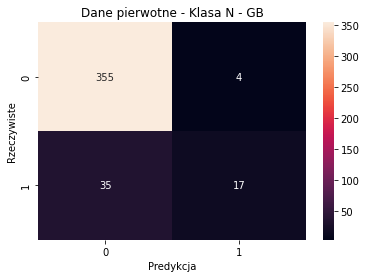

In [8]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa N - GB')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [26]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1')
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1', beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.327
Precision: 0.810
F1score: 0.466
